# Imports

In [ ]:
import importlib
import utils.biopython_tools as bptools
import json
import pandas as pd

In [28]:
importlib.reload(bptools)

<module 'utils.biopython_tools' from '/home/markus/projects/riff_diff/ensemble_evaluator/ensemble_evaluator/utils/biopython_tools.py'>

In [9]:
motif_d = {"A": [1, 2, 3, 4, 5], "B": [6, 7, 8, 9]}
def convert_motifdict_to_list(motif_dict: dict) -> list: 
    return [(chain, res) for chain in motif_dict for res in motif_dict[chain]]

print(convert_motifdict_to_list(motif_d))

[('A', 1), ('A', 2), ('A', 3), ('A', 4), ('A', 5), ('B', 6), ('B', 7), ('B', 8), ('B', 9)]


# Test replacement

In [18]:
# get motif dicts:
motif_df = pd.read_json("/home/markus/projects/rfdiffusion_testing/motif_replacement/motif_res.json")
pose_motif = motif_df.loc["D33-C34-B26-A44_0001_0001"]["motif_residues"]

In [12]:
pose_p = "/home/markus/projects/rfdiffusion_testing/motif_replacement/D33-C34-B26-A44_0001_0001.pdb"
motif_pose_p = "/home/markus/projects/rfdiffusion_testing/motif_replacement/ref_fragment/D33-C34-B26-A44_0001_0001.pdb"

In [46]:
importlib.reload(bptools)
bptools.replace_motif_and_add_ligand(pose_p, motif_pose_p, pose_motif, pose_motif, new_pose="/home/markus/projects/rfdiffusion_testing/motif_replacement/D33-C34-B26-A44_0001_0001_replaced.pdb", ligand_chain="F")
#
#


4
5
6
7
8
9
10
21
22
23
24
25
26
27
38
39
40
41
42
43
44
53
54
55
56
57
58
59


'/home/markus/projects/rfdiffusion_testing/motif_replacement/D33-C34-B26-A44_0001_0001_replaced.pdb'

# Function for Contig reordering

In [15]:
pose_opts = "/home/mabr3112/anaconda3/envs/SE3nv/bin/python3 /home/mabr3112/RFdiffusion/run_inference.py diffuser.T=20 potentials.guide_scale=5 inference.num_designs=15 potentials.guiding_potentials=[\'type:monomer_ROG,weight:1000,min_dist:0.1\',\'type:substrate_contacts,weight:5\'] potentials.guide_decay='quadratic' 'contigmap.contigs=[3/A1-7/10/B1-7/8/C1-7/10/D1-7/37]' 'contigmap.inpaint_seq=[A1/A3/A4/A5/A6/A7/B1/B2/B3/B4/B5/B7/C1/C2/C3/C4/C6/C7/D1/D2/D4/D5/D6/D7]' potentials.substrate=EQU inference.output_prefix=/home/mabr3112/projects/riff_diff/ksi/diffusion/ksi_diff_small_v2_rog/rfdiffusion/output_pdbs//C2-A46-D50-B11 inference.input_pdb=/home/mabr3112/projects/riff_diff/ksi/paths/ksi_diff_small/pdb_in/C2-A46-D50-B11.pdb"
total_length = 200


In [24]:
full_contig_str = [x for x in pose_opts.split(" ") if x.startswith("'contigmap.contigs")][0]
contig_str = full_contig_str[full_contig_str.find("[")+1:full_contig_str.find("]")]
contigs = [x for x in contig_str.split("/") if x][1:-1]
new_contigs = "/".join([x if x[0].isalpha() else f"{x}-100" for x in contigs])
new_contig_str = full_contig_str.replace("/".join(contigs), new_contigs)
print(new_contigs)
print("/".join(contigs))

print(pose_opts.replace(full_contig_str, f"{new_contig_str} contigmap.length={total_length} "))

A1-7/10-100/B1-7/8-100/C1-7/10-100/D1-7
A1-7/10/B1-7/8/C1-7/10/D1-7
/home/mabr3112/anaconda3/envs/SE3nv/bin/python3 /home/mabr3112/RFdiffusion/run_inference.py diffuser.T=20 potentials.guide_scale=5 inference.num_designs=15 potentials.guiding_potentials=['type:monomer_ROG,weight:1000,min_dist:0.1','type:substrate_contacts,weight:5'] potentials.guide_decay='quadratic' 'contigmap.contigs=[3/A1-7/10-100/B1-7/8-100/C1-7/10-100/D1-7/37]' contigmap.length=200  'contigmap.inpaint_seq=[A1/A3/A4/A5/A6/A7/B1/B2/B3/B4/B5/B7/C1/C2/C3/C4/C6/C7/D1/D2/D4/D5/D6/D7]' potentials.substrate=EQU inference.output_prefix=/home/mabr3112/projects/riff_diff/ksi/diffusion/ksi_diff_small_v2_rog/rfdiffusion/output_pdbs//C2-A46-D50-B11 inference.input_pdb=/home/mabr3112/projects/riff_diff/ksi/paths/ksi_diff_small/pdb_in/C2-A46-D50-B11.pdb


In [26]:
def overwrite_linker_length(pose_opts: str, total_length:int, max_linker_length:int=100) -> str:
    '''overwrites linker length and allows linkers to be of any length (with at least the provided linker length)'''
    full_contig_str = [x for x in pose_opts.split(" ") if x.startswith("'contigmap.contigs")][0]
    contig_str = full_contig_str[full_contig_str.find("[")+1:full_contig_str.find("]")]
    contigs = [x for x in contig_str.split("/") if x][1:-1]
    new_contigs = "/".join([x if x[0].isalpha() else f"{x}-{max_linker_length}" for x in contigs])
    new_contig_str = full_contig_str.replace("/".join(contigs), new_contigs)
    return pose_opts.replace(full_contig_str, f"{new_contig_str} contigmap.length={total_length} ")

In [27]:
print(overwrite_linker_length(pose_opts, total_length=400, max_linker_length=123))

/home/mabr3112/anaconda3/envs/SE3nv/bin/python3 /home/mabr3112/RFdiffusion/run_inference.py diffuser.T=20 potentials.guide_scale=5 inference.num_designs=15 potentials.guiding_potentials=['type:monomer_ROG,weight:1000,min_dist:0.1','type:substrate_contacts,weight:5'] potentials.guide_decay='quadratic' 'contigmap.contigs=[3/A1-7/10-123/B1-7/8-123/C1-7/10-123/D1-7/37]' contigmap.length=400  'contigmap.inpaint_seq=[A1/A3/A4/A5/A6/A7/B1/B2/B3/B4/B5/B7/C1/C2/C3/C4/C6/C7/D1/D2/D4/D5/D6/D7]' potentials.substrate=EQU inference.output_prefix=/home/mabr3112/projects/riff_diff/ksi/diffusion/ksi_diff_small_v2_rog/rfdiffusion/output_pdbs//C2-A46-D50-B11 inference.input_pdb=/home/mabr3112/projects/riff_diff/ksi/paths/ksi_diff_small/pdb_in/C2-A46-D50-B11.pdb


In [2]:
from matplotlib import pyplot as plt
import numpy as np

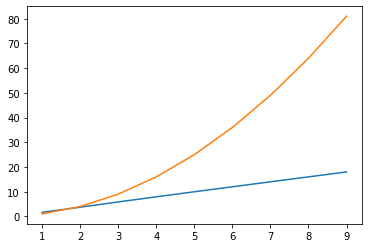

In [33]:
def f(x):
    return x + x * (1 - 1/np.exp(x))

x = np.arange(1, 10)


plt.plot(x, f(x))
plt.plot(x, x **2)

### Test contigs string parsing:

In [2]:
import re

command = "diffuser.T=50 potentials.guide_scale=5 inference.num_designs=10 potentials.guiding_potentials=['type:substrate_contacts,weight:0','type:substrate_motif_contacts,weight:4.0,cen_weight:0,pos_weight:6,neg_weight:0'] potentials.guide_decay=quadratic 'contigmap.contigs=[Q1-6/0 20/A1-7/6-50/B1-7/9-50/C1-7/3-50/D1-7/20]' contigmap.length=200-200 'contigmap.inpaint_seq=[A1/A2/A3/A4/A5/A7/B1/B2/B3/B5/B6/B7/C1/C2/C3/C5/C6/C7/D1/D3/D4/D5/D6/D7]' potentials.substrate=EQU inference.output_prefix=polyala_test6/C8-B5-D5-A0 inference.input_pdb=pdb_in/added_chainQ/C8-B5-D5-A0.pdb"

arguments = re.split(r"\s+(?=(?:[^']*'[^']*')*[^']*$)", command)

print(arguments)
print(type(arguments))

['diffuser.T=50', 'potentials.guide_scale=5', 'inference.num_designs=10', "potentials.guiding_potentials=['type:substrate_contacts,weight:0','type:substrate_motif_contacts,weight:4.0,cen_weight:0,pos_weight:6,neg_weight:0']", 'potentials.guide_decay=quadratic', "'contigmap.contigs=[Q1-6/0 20/A1-7/6-50/B1-7/9-50/C1-7/3-50/D1-7/20]'", 'contigmap.length=200-200', "'contigmap.inpaint_seq=[A1/A2/A3/A4/A5/A7/B1/B2/B3/B5/B6/B7/C1/C2/C3/C5/C6/C7/D1/D3/D4/D5/D6/D7]'", 'potentials.substrate=EQU', 'inference.output_prefix=polyala_test6/C8-B5-D5-A0', 'inference.input_pdb=pdb_in/added_chainQ/C8-B5-D5-A0.pdb']
<class 'list'>


# Torch testing:

In [1]:
import torch

In [51]:
import torch

def transform_trailing_true_to_false(T):
    Tk = torch.clone(T)  # Create a clone of the input tensor

    if torch.any(Tk):
        trailing_true_indices = torch.where(Tk.flip(dims=(0,)) == True)[0]
        print(trailing_true_indices)
        first_trailing_true_index = Tk.size(0) - trailing_true_indices.size(0)
        print(first_trailing_true_index)
        Tk[first_trailing_true_index:] = False

    return Tk

def transform_v2(T):
    '''AAA'''
    def get_trailing_index(T):
        for i, bool in enumerate(np.array(T)[::-1]):
            if bool == False and i>0: return i
    Tk = torch.clone(T)
    
    if torch.any(Tk):
        t_idx = get_trailing_index(Tk)
        Tk[-t_idx:] = False
        return Tk
    else:
        return Tk
    
def transform_bool_tensor(T: torch.tensor) -> torch.tensor:
    '''creates new diffusion mask with reduced flanking regions for motif contigs'''
    Tt = np.copy(T)  # Create a copy of the input tensor

    for i in range(1, T.shape[0] - 1):
        if T[i - 1] == False or T[i + 1] == False:
            Tt[i] = False
    print(torch.tensor(Tt))

    return torch.tensor(Tt)

def transform_boolean_list(L):
    Lt = [L[0]]  # Start with the first element of L

    for i in range(1, len(L) - 1):
        if Lt[-1] or not L[i + 1]:
            Lt.append(L[i])
        else:
            Lt.append(False)

    Lt.append(L[-1])  # Add the last element of L to Lt

    return Lt


In [52]:
T = torch.tensor([True, True, True, False, False, True, True, True, True, False, False, False, True, True, True, False, False, True, True, True])
Tk = transform_v2(T)    

In [53]:
print(T)
print(transform_bool_tensor(T))

tensor([ True,  True,  True, False, False,  True,  True,  True,  True, False,
        False, False,  True,  True,  True, False, False,  True,  True,  True])
tensor([ True,  True, False, False, False, False,  True,  True, False, False,
        False, False, False,  True, False, False, False, False,  True,  True])
tensor([ True,  True, False, False, False, False,  True,  True, False, False,
        False, False, False,  True, False, False, False, False,  True,  True])


In [13]:
print(len(T))
print(len(Tk))

17
17


# Other Stuff

In [26]:
import pandas as pd
import re

def re_split_rfdiffusion_opts(command: str) -> list:
    if command is None:
        return []
    return re.split(r"\s+(?=(?:[^']*'[^']*')*[^']*$)", command)

def exchange_contig(input_str: str, motif: dict) -> str:
    ''' exchanges contig of rfdiffusion to fit active_site model requirements'''
    # split args in rfdiffusion string and remove inpaint_seq
    opts_l = [x for x in re_split_rfdiffusion_opts(input_str) if not "inpaint_seq" in x]
    contig = opts_l[0]

    # change linker minimum lengths:
    contig = replace_number_with_10(contig)

    # exchange fixed residues in contig:
    for chain, res in motif.items():
        contig = contig.replace(f"{chain}1-7", f"{chain}{res[0]}-{res[0]}")
    
    # remerge contig into opts_l and return concatenated opts:
    opts_l[0] = contig
    return " ".join(opts_l)

def replace_number_with_10(input_string):
    # This regex matches any sequence of digits followed by '-50'
    pattern = r'\d+-50'
    # Replace found patterns with '10-50'
    return re.sub(pattern, '10-50', input_string)

In [2]:
df = pd.read_json("/home/markus/projects/riff_diff/ensemble_evaluator/diff_scores/rad/rad_cone_long_50_t2/rad_cone_long_50_t2_scores.json")

In [29]:
old_opts = df.loc[0, "rfdiffusion_pose_opts"]
motif = df.loc[0, "template_fixedres"]

new_opts = exchange_contig(old_opts, motif)

print(old_opts)
print(new_opts)

'contigmap.contigs=[Q5-16/0 20/A1-7/7-50/B1-7/10-50/C1-7/8-50/D1-7/20]' contigmap.length=200-200  'contigmap.inpaint_seq=[A1/A3/A4/A5/A6/A7/B1/B2/B4/B5/B6/B7/C1/C3/C4/C5/C6/C7/D1/D2/D3/D4/D5/D7]' potentials.substrate=LLK
'contigmap.contigs=[Q5-16/0 20/A2-2/10-50/B3-3/10-50/C2-2/10-50/D6-6/20]' contigmap.length=200-200 potentials.substrate=LLK


In [14]:
print(df["template_fixedres"])

0     {'A': [2], 'B': [3], 'C': [2], 'D': [6]}
1     {'A': [5], 'B': [3], 'C': [5], 'D': [6]}
2     {'A': [3], 'B': [2], 'C': [3], 'D': [5]}
3     {'A': [3], 'B': [2], 'C': [3], 'D': [5]}
4     {'A': [5], 'B': [3], 'C': [5], 'D': [6]}
5     {'A': [5], 'B': [2], 'C': [5], 'D': [3]}
6     {'A': [6], 'B': [4], 'C': [4], 'D': [6]}
7     {'A': [6], 'B': [4], 'C': [4], 'D': [6]}
8     {'A': [6], 'B': [4], 'C': [4], 'D': [6]}
9     {'A': [3], 'B': [2], 'C': [3], 'D': [5]}
10    {'A': [6], 'B': [4], 'C': [4], 'D': [6]}
11    {'A': [6], 'B': [5], 'C': [3], 'D': [4]}
12    {'A': [3], 'B': [2], 'C': [6], 'D': [5]}
13    {'A': [2], 'B': [5], 'C': [4], 'D': [4]}
14    {'A': [4], 'B': [4], 'C': [6], 'D': [6]}
15    {'A': [5], 'B': [5], 'C': [5], 'D': [4]}
16    {'A': [2], 'B': [6], 'C': [5], 'D': [5]}
17    {'A': [6], 'B': [5], 'C': [2], 'D': [4]}
18    {'A': [5], 'B': [5], 'C': [6], 'D': [3]}
19    {'A': [6], 'B': [5], 'C': [2], 'D': [4]}
20    {'A': [2], 'B': [6], 'C': [6], 'D': [5]}
21    {'A': [

In [10]:
opts = df.loc[0,"rfdiffusion_pose_opts"]
opts_l = re_split_rfdiffusion_opts(opts)
opts_l = [x for x in opts_l if "inpaint_seq" not in x]
#opts_l[0] = exchange_contig(opts_l[0])

In [24]:
x = opts_l[0]

In [25]:
print(x)
motif = df.loc[0, "template_fixedres"]
for chain, res in motif.items():
    x = x.replace(f"{chain}1-7", f"{chain}{res[0]}-{res[0]}")
print(x)

'contigmap.contigs=[Q5-16/0 20/A1-7/7-50/B1-7/10-50/C1-7/8-50/D1-7/20]'
'contigmap.contigs=[Q5-16/0 20/A2-2/7-50/B3-3/10-50/C2-2/8-50/D6-6/20]'


In [17]:
target_contig = 'contigmap.contigs=[Q1-16/0 30/A2-2/10-50/B5-5/10-50/C6-6/10-50/D5-5/30]'
print(target_contig)

contigmap.contigs=[Q1-16/0 30/A2-2/10-50/B5-5/10-50/C6-6/10-50/D5-5/30]


In [1]:
motif = {"A": [1, 23, 5, 3], "B": [3, 4, 6, 1], "C": [5,6,7,8,3,4], "D": [1,2,3,4]}
out_l = [f"{chain}{resi}" for chain, res_l in motif.items() for resi in res_l]

In [2]:
print(out_l)

['A1', 'A23', 'A5', 'A3', 'B3', 'B4', 'B6', 'B1', 'C5', 'C6', 'C7', 'C8', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
